In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine


In [8]:
# PostgreSQL connection parameters
# host = "localhost"
# user = "postgres"
# password = "Admin"
# database = "telecom_db"
# table_name = "xdr_data"
# conn_str = f"postgresql+psycopg2://{user}:{password}@{host}/{database}"
# engine = create_engine(conn_str)
# query = f"SELECT * FROM {table_name};"
# df = pd.read_sql(query, engine)
# print('number of rows', df.shape[0])
# print('number of columns', df.shape[1]

In [10]:
df=pd.read_csv('telcom_data.csv')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,9223372036854775807,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,9223372036854775807,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,9223372036854775807,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,9223372036854775807,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,9223372036854775807,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,9223372036854775807,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,9223372036854775807,4/29/2019 7:28,696,4/30/2019 10:40,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


In [12]:
df.dtypes

Bearer Id                                    int64
Start                                       object
Start ms                                     int64
End                                         object
End ms                                       int64
Dur. (ms)                                    int64
IMSI                                         int64
MSISDN/Number                                int64
IMEI                                         int64
Last Location Name                          object
Avg RTT DL (ms)                              int64
Avg RTT UL (ms)                              int64
Avg Bearer TP DL (kbps)                      int64
Avg Bearer TP UL (kbps)                      int64
TCP DL Retrans. Vol (Bytes)                  int64
TCP UL Retrans. Vol (Bytes)                  int64
DL TP < 50 Kbps (%)                          int64
50 Kbps < DL TP < 250 Kbps (%)               int64
250 Kbps < DL TP < 1 Mbps (%)                int64
DL TP > 1 Mbps (%)             

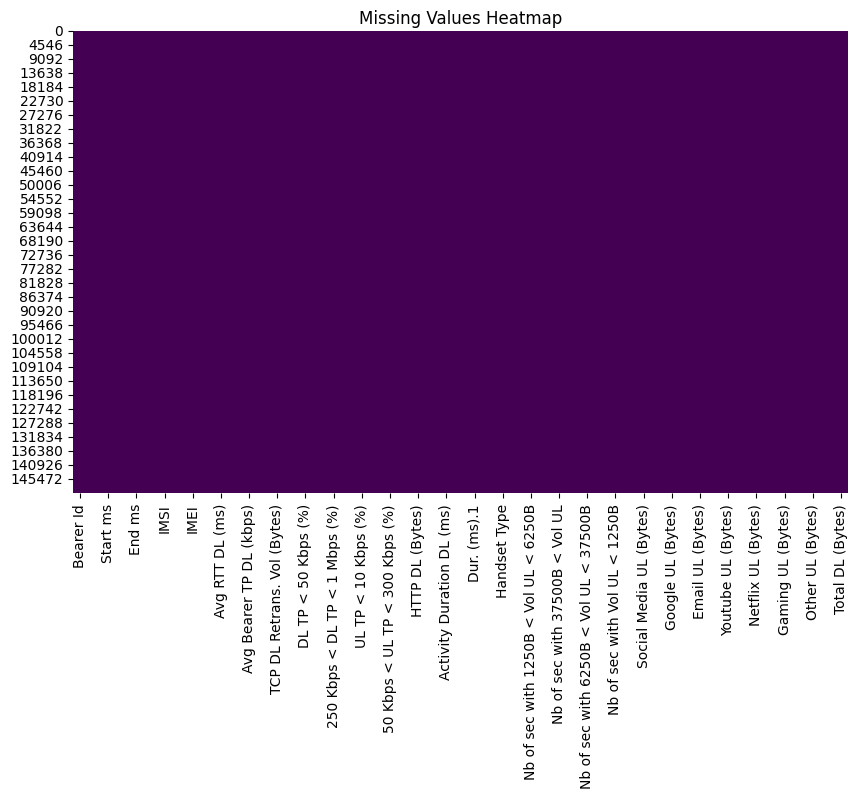

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
# Handle missing values for numerical columns
for column_mean in df.select_dtypes(include='number'):
    try:
        df[column_mean] = pd.to_numeric(df[column_mean], errors='coerce')
        mean_value = df[column_mean].mean(skipna=True)
        df[column_mean].fillna(mean_value, inplace=True)
    except Exception as e:
        print(f"Error processing column '{column_mean}': {e}")

In [13]:
# Handle the missig values present in categorical columns 
for column in df.select_dtypes(include='object'):
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [14]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

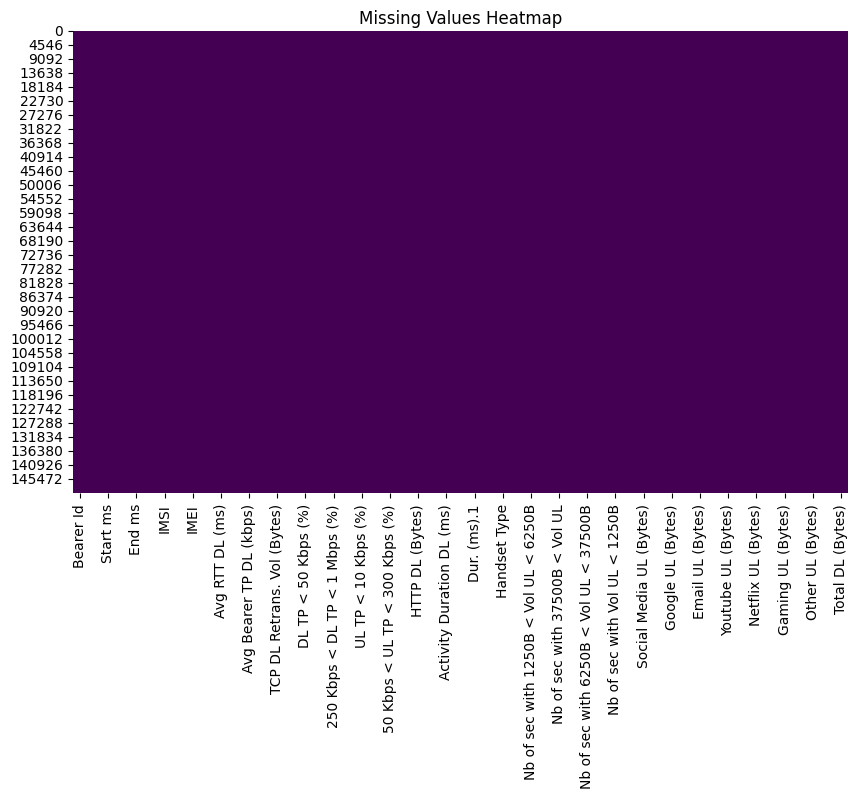

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
cleaned_filename = 'cleaned_dataset.csv'
df.to_csv(cleaned_filename, index=False)

print(f"Cleaned data saved to '{cleaned_filename}'")

Cleaned data saved to 'cleaned_dataset.csv'
